## Atividade 2

Tendo como referência a imagem de uma nota fiscal (no repositório, “imagens/nota-fiscal.png”), realize alguma transformação de tal forma que fique somente o boleto na imagem, sem o background, ajustando sua perspectiva.

Como dito em sala, essa operação é bastante similar à utilizada em aplicações de escaneamento de documentos.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Faça upload da imagem se utilizando do seguinte snippet de código:

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving nota-fiscal.png to nota-fiscal.png
Usuario fez upload da imagem "nota-fiscal.png" com tamanho 308872 bytes


Importação das bibliotecas.

In [1]:
import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_6290/344068320.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 2. Solução

In [3]:
images = glob.glob("/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/Visao Computacional/Atividades Checkpoint - Visão Computacional/Atividade 2/imagens/*")

In [5]:
images

['/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/Visao Computacional/Atividades Checkpoint - Visão Computacional/Atividade 2/imagens/nota-fiscal.png']

Text(0.5, 1.0, 'Original')

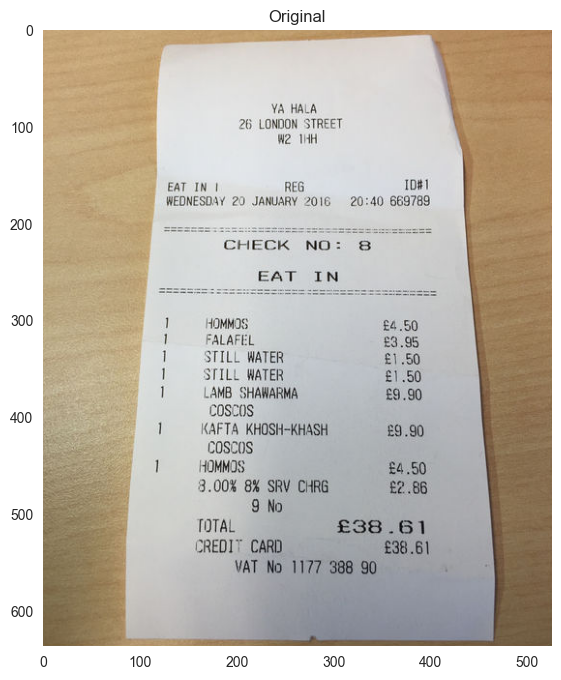

In [17]:
imagem = cv2.imread(images[0])
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(imagem)
plt.title("Original")

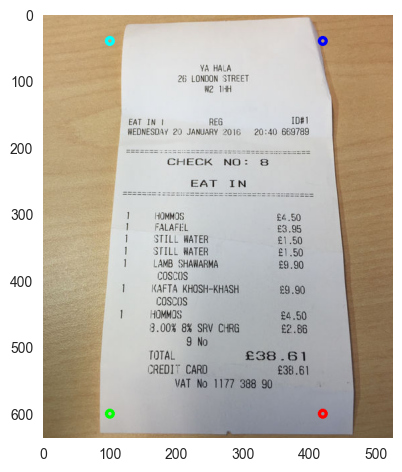

In [35]:
# IMPLEMENTAR
imagem = cv2.imread(images[0])
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

p1 = (100, 40)
p2 = (420, 40)
p3 = (100, 600)
p4 = (420, 600)

tamanho_final = (400, 700)

pontos_marcadores = np.float32([p1, p2, p3, p4])
pontos_destino = np.float32(
    [(0, 0), (tamanho_final[0], 0), (0, tamanho_final[1]), tamanho_final]
)

cv2.circle(imagem, p1, 5, (0, 255, 255), 3)
cv2.circle(imagem, p2, 5, (0, 0, 255), 3)
cv2.circle(imagem, p3, 5, (0, 255, 0), 3)
cv2.circle(imagem, p4, 5, (255, 0, 0), 3)

plt.imshow(imagem)

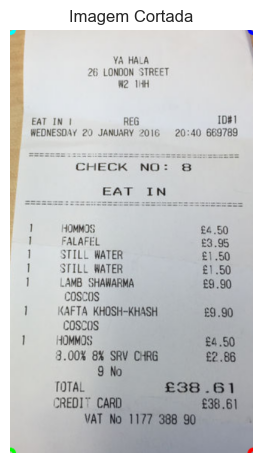

In [38]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
img = cv2.warpPerspective(imagem, matriz_perspectiva, tamanho_final)
plt.title("Imagem Cortada")
plt.axis("off")
plt.imshow(img);